In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pymysql

In [6]:
df1 = pd.read_csv(r"C:/Users/91894/OneDrive/Desktop/DATASET/Customers.csv", encoding='ISO-8859-1')
df1

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


In [8]:
df1.shape

(15266, 10)

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [12]:
df1.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

In [14]:
df1[df1["State Code"].isnull()]

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


In [16]:
df1["State Code"] = df1["State Code"].fillna("NA")

In [18]:
df1["Birthday"] = pd.to_datetime(df1["Birthday"])

In [20]:
# df1.info()

In [22]:
df1

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


In [24]:
df2 = pd.read_csv("C:/Users/91894/OneDrive/Desktop/DATASET/Data_Dictionary.csv")
df2

,Table,Field,Description
0,Sales,Order Number,Unique ID for each order
1,Sales,Line Item,Identifies individual products purchased as pa...
2,Sales,Order Date,Date the order was placed
3,Sales,Delivery Date,Date the order was delivered
4,Sales,CustomerKey,Unique key identifying which customer placed t...
5,Sales,StoreKey,Unique key identifying which store processed t...
6,Sales,ProductKey,Unique key identifying which product was purch...
7,Sales,Quantity,Number of items purchased
8,Sales,Currency Code,Currency used to process the order
9,Customers,CustomerKey,Primary key to identify customers


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Table        37 non-null     object
 1   Field        37 non-null     object
 2   Description  37 non-null     object
dtypes: object(3)
memory usage: 1020.0+ bytes


In [28]:
df2.isnull().sum()

Table          0
Field          0
Description    0
dtype: int64

In [30]:
df3 = pd.read_csv("C:/Users/91894/OneDrive/Desktop/DATASET/Exchange_Rates.csv")
df3

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


In [32]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [34]:
df3.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

In [36]:
df3["Date"] = pd.to_datetime(df3["Date"])
df3["Currency"] = df3["Currency"].astype(str)

In [38]:
# df3.info()

In [39]:
df4 = pd.read_csv("C:/Users/91894/OneDrive/Desktop/DATASET/Products.csv")
df4

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


In [40]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [41]:
df4.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [42]:
# df4["Subcategory"].value_counts()

In [43]:
df4["Unit Cost USD"] = df4["Unit Cost USD"].str.replace('$','').astype(str)
df4["Unit Price USD"] = df4["Unit Price USD"].str.replace('$','').astype(str)
# df4

In [44]:
df5 = pd.read_csv("C:/Users/91894/OneDrive/Desktop/DATASET/Sales.csv")
df5

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2/20/2021,NaN,1216913,43,632,3,USD
62880,2243031,1,2/20/2021,2/24/2021,511229,0,98,4,EUR
62881,2243032,1,2/20/2021,2/23/2021,331277,0,1613,2,CAD
62882,2243032,2,2/20/2021,2/23/2021,331277,0,1717,2,CAD


In [45]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [46]:
df5.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [47]:
df5["Order Date"] = pd.to_datetime(df5["Order Date"])
df5["Delivery Date"] = pd.to_datetime(df5["Delivery Date"])
df5["Currency Code"] = df5["Currency Code"].astype(str)

In [48]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  13165 non-null  datetime64[ns]
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 4.3+ MB


In [49]:
df5[df5["Delivery Date"].isnull()]

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,NaT,265598,10,1304,1,CAD
6,366004,1,2016-01-01,NaT,1107461,38,163,6,GBP
7,366004,2,2016-01-01,NaT,1107461,38,1529,2,GBP
8,366005,1,2016-01-01,NaT,844003,33,421,4,EUR
9,366007,1,2016-01-01,NaT,2035771,43,1617,1,USD
...,...,...,...,...,...,...,...,...,...
62867,2243025,1,2021-02-20,NaT,1909290,49,1128,2,USD
62868,2243025,2,2021-02-20,NaT,1909290,49,2511,2,USD
62869,2243026,1,2021-02-20,NaT,1737466,49,58,6,USD
62872,2243028,1,2021-02-20,NaT,1728060,66,1584,3,USD


In [50]:
# df5['Delivery Date'] = df5['Delivery Date'].fillna(df5['Order Date'] + pd.Timedelta(days=3))
df5['Delivery Date'] = df5['Delivery Date'].fillna("Not Available")

In [51]:
# df5

In [52]:
df6 = pd.read_csv("C:/Users/91894/OneDrive/Desktop/DATASET/Stores.csv")
df6

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
...,...,...,...,...,...
62,63,United States,Utah,2000.0,3/6/2008
63,64,United States,Washington DC,1330.0,1/1/2010
64,65,United States,West Virginia,1785.0,1/1/2012
65,66,United States,Wyoming,840.0,1/1/2014


In [53]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  66 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [70]:
df6.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [71]:
df6 = df6.fillna(0)

In [72]:
# df6.info()

In [76]:
df6["Open Date"] = pd.to_datetime(df6["Open Date"])
df6["Country"] = df6["Country"].astype(str)
df6["State"] =df6["State"].astype(str)

In [78]:
# df6

# Combining different Dataframe

In [81]:
# create Overall_sales

sal_cus = pd.merge(df5, df1, on="CustomerKey", how="inner")
# sal_cus

In [83]:
sal_cus_prod = pd.merge(sal_cus, df4, on="ProductKey", how="inner" )
# sal_cus_prod

In [85]:
# sal_cus_prod.isnull().sum()

In [87]:
sal_cus_prod_ex = pd.merge(sal_cus_prod, df3, left_on = ["Order Date","Currency Code"],right_on= ["Date","Currency"], how="inner")
# sal_cus_prod_ex

In [89]:
sal_cus_prod_ex_sto = pd.merge(sal_cus_prod_ex, df6, on=["StoreKey","State","Country"], how="inner")
# sal_cus_prod_ex_sto

In [92]:
overall_sales = sal_cus_prod_ex_sto
overall_sales = overall_sales.drop(["Delivery Date"],axis=1)
overall_sales

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,Name,...,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Date,Currency,Exchange,Square Meters,Open Date
0,366005,1,2016-01-01,844003,33,421,4,EUR,Male,Ouassim Heuver,...,469.00,303,Desktops,3,Computers,2016-01-01,EUR,0.9185,1540.0,2015-12-09
1,367006,1,2016-01-02,693285,18,2445,3,EUR,Female,Solaine Lanoie,...,4.99,808,Fans,8,Home Appliances,2016-01-02,EUR,0.9185,310.0,2012-08-08
2,367010,1,2016-01-02,1322959,66,917,1,USD,Male,Eric Williams,...,179.00,308,Computers Accessories,3,Computers,2016-01-02,USD,1.0000,840.0,2014-01-01
3,367010,2,2016-01-02,1322959,66,39,1,USD,Male,Eric Williams,...,299.23,101,MP4&MP3,1,Audio,2016-01-02,USD,1.0000,840.0,2014-01-01
4,369007,1,2016-01-04,571622,20,2510,3,EUR,Male,Sven Schulze,...,4.06,505,Cell phones Accessories,5,Cell phones,2016-01-04,EUR,0.9176,1715.0,2012-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6176,2243014,1,2021-02-20,1453427,50,423,1,USD,Male,Ralph Thompson,...,599.00,303,Desktops,3,Computers,2021-02-20,USD,1.0000,2000.0,2008-03-06
6177,2243014,2,2021-02-20,1453427,50,1617,1,USD,Male,Ralph Thompson,...,57.99,602,Movie DVD,6,"Music, Movies and Audio Books",2021-02-20,USD,1.0000,2000.0,2008-03-06
6178,2243014,3,2021-02-20,1453427,50,2506,4,USD,Male,Ralph Thompson,...,4.74,505,Cell phones Accessories,5,Cell phones,2021-02-20,USD,1.0000,2000.0,2008-03-06
6179,2243021,1,2021-02-20,1783631,55,1147,4,USD,Male,Louis Camacho,...,655.00,405,Camcorders,4,Cameras and camcorders,2021-02-20,USD,1.0000,2000.0,2009-12-15


In [94]:
overall_sales.to_csv("overall_sales.csv")

# Label Encoder

In [97]:
encoder = LabelEncoder()
def encode(df):
    for i in df.columns:
        if df[i].dtype == 'object':
            df[i] = encoder.fit_transform(df[i])

In [99]:
encode(overall_sales)

# Outlier Detection

# 1. iqr Range

In [103]:
def out_det():
    print(ll)
    print(ul)
    print(iqr)

In [105]:
df = overall_sales
col = ['CustomerKey', 'ProductKey', 'StoreKey', 'Order Number']
q1 = df[col].quantile(0.25)
q3 = df[col].quantile(0.75)
iqr = q3-q1
ll = q1-1.5*iqr
ul = q3+1.5*iqr

In [107]:
out_det()

CustomerKey    -1326580.0
ProductKey        -1389.0
StoreKey            -29.0
Order Number     204026.0
dtype: float64
CustomerKey     3605116.0
ProductKey         3475.0
StoreKey            107.0
Order Number    2755986.0
dtype: float64
CustomerKey     1232924.0
ProductKey         1216.0
StoreKey             34.0
Order Number     637990.0
dtype: float64


In [109]:
# Detect outliers
outliers = overall_sales[(overall_sales[col] < ll) | (overall_sales[col] > ul)]

# Print or analyze the outliers
print(f'Number of outliers: {len(outliers)}')
# outliers

Number of outliers: 6181


# 2. using BoxPlot

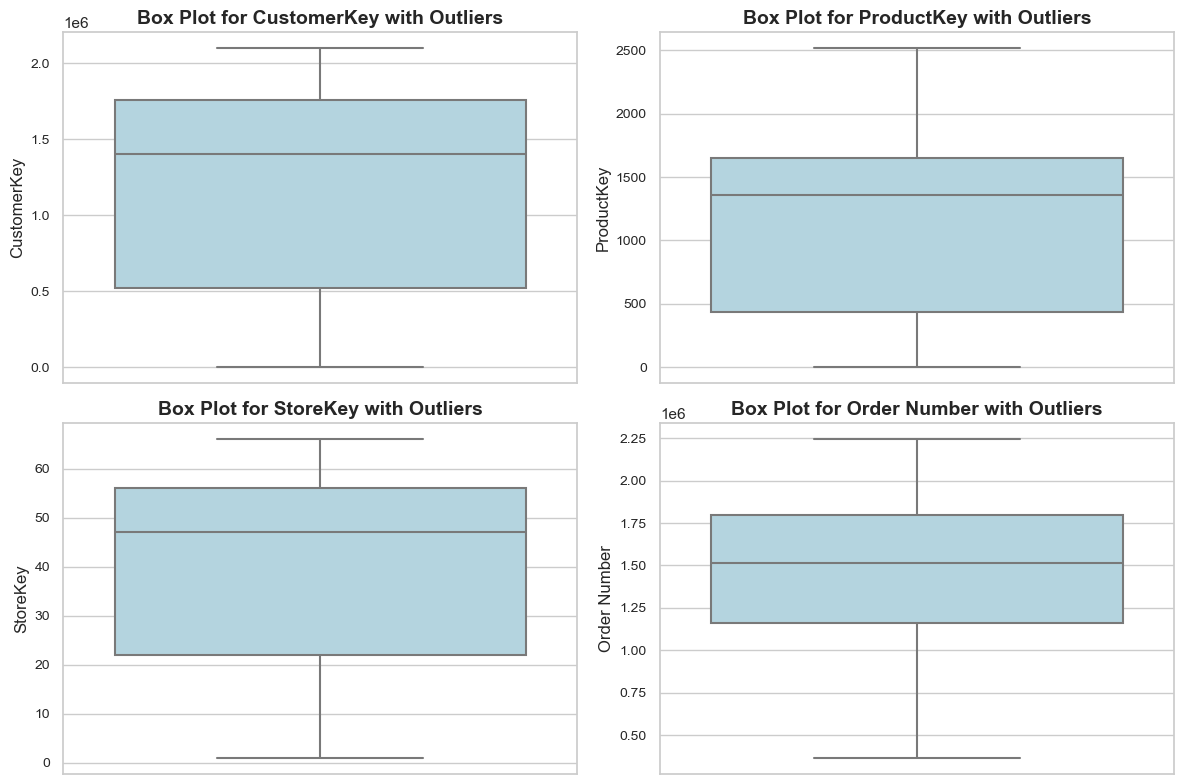

In [112]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming overall_sales is your DataFrame
# overall_sales = pd.read_csv('path_to_your_combined_data.csv')  # Uncomment and load your dataset

# Set a Seaborn style
sns.set(style="whitegrid")

# Create box plots for each column
plt.figure(figsize=(12, 8))

for i, column in enumerate(col, start=1):
    plt.subplot(2, 2, i)  # Create a 2x2 grid of subplots
    sns.boxplot(data=overall_sales, y=column, color="lightblue", fliersize=5, linewidth=1.5)
    plt.title(f'Box Plot for {column} with Outliers', fontsize=14, fontweight='bold')
    plt.ylabel(column, fontsize=12)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)

plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


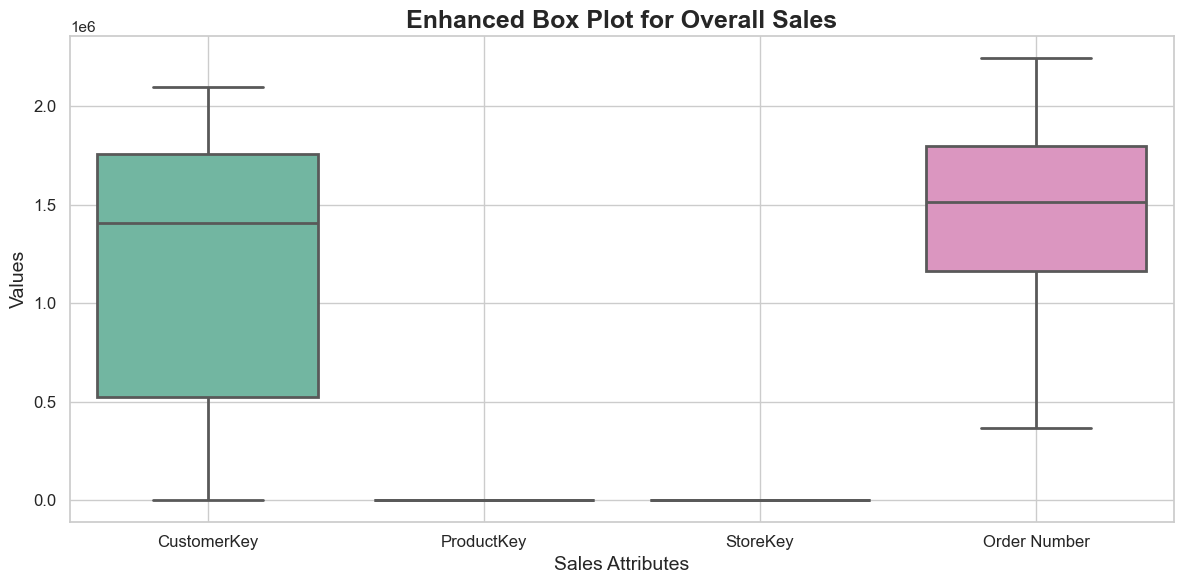

In [113]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set a style using Seaborn for enhanced aesthetics
sns.set(style="whitegrid")

# Set the figure size for better readability
plt.figure(figsize=(12, 6))

# Create the box plot using Seaborn for better visuals
sns.boxplot(data=overall_sales[col], palette="Set2", fliersize=6, linewidth=2)

# Customize the plot
plt.title('Enhanced Box Plot for Overall Sales', fontsize=18, fontweight='bold')
plt.xlabel('Sales Attributes', fontsize=14)
plt.ylabel('Values', fontsize=14)
plt.xticks(fontsize=12)  # Adjust the font size of x-axis ticks
plt.yticks(fontsize=12)  # Adjust the font size of y-axis ticks

# Show the grid for better interpretation
plt.grid(True)

# Show the enhanced plot
plt.tight_layout()  # Adjust layout to prevent label clipping
plt.show()


# Finding Reltionship between variables

In [115]:
overall_sales.corr()

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,Name,...,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Date,Currency,Exchange,Square Meters,Open Date
Order Number,1.000000,0.005260,1.000000,0.024958,0.023828,-0.001367,-0.006477,0.020724,-0.039155,-0.041037,...,0.028524,-0.009698,-0.027493,-0.009247,-0.054109,1.000000,0.020724,0.034935,-0.013715,0.067628
Line Item,0.005260,1.000000,0.005259,0.002222,-0.000992,0.021525,-0.003823,0.006671,-0.006157,-0.008991,...,0.016071,0.017627,-0.003624,0.017550,0.001275,0.005259,0.006671,-0.005352,0.010338,-0.009709
Order Date,1.000000,0.005259,1.000000,0.024959,0.023829,-0.001367,-0.006477,0.020725,-0.039156,-0.041038,...,0.028523,-0.009699,-0.027492,-0.009247,-0.054110,1.000000,0.020725,0.034934,-0.013714,0.067628
CustomerKey,0.024958,0.002222,0.024959,1.000000,0.908575,-0.017986,0.001518,0.892860,-0.017043,0.043844,...,-0.003211,-0.019312,-0.001257,-0.019130,-0.020931,0.024959,0.892860,-0.537438,-0.082408,-0.143152
StoreKey,0.023828,-0.000992,0.023829,0.908575,1.000000,-0.007702,-0.000991,0.921799,0.002939,0.032241,...,-0.003335,-0.010754,0.009308,-0.010610,-0.012069,0.023829,0.921799,-0.599831,-0.079113,-0.130159
ProductKey,-0.001367,0.021525,-0.001367,-0.017986,-0.007702,1.000000,0.007396,-0.004874,0.025124,0.002474,...,0.053061,0.934402,0.100944,0.933155,0.374856,-0.001367,-0.004874,0.000035,0.002101,-0.011456
Quantity,-0.006477,-0.003823,-0.006477,0.001518,-0.000991,0.007396,1.000000,-0.004587,0.003522,0.016672,...,-0.005321,0.013397,-0.002896,0.013476,0.022802,-0.006477,-0.004587,0.003732,0.010284,0.014617
Currency Code,0.020724,0.006671,0.020725,0.892860,0.921799,-0.004874,-0.004587,1.000000,0.011175,0.068493,...,0.002839,-0.008742,0.000014,-0.008580,-0.014209,0.020725,1.000000,-0.799859,-0.152826,-0.215121
Gender,-0.039155,-0.006157,-0.039156,-0.017043,0.002939,0.025124,0.003522,0.011175,1.000000,0.054422,...,0.015200,0.023989,-0.019993,0.024087,0.005357,-0.039156,0.011175,-0.019421,-0.036166,0.002514
Name,-0.041037,-0.008991,-0.041038,0.043844,0.032241,0.002474,0.016672,0.068493,0.054422,1.000000,...,0.006169,0.005817,-0.016292,0.005799,0.003040,-0.041038,0.068493,-0.084722,-0.020097,-0.031802


In [116]:
# target column
col = ['CustomerKey', 'ProductKey', 'StoreKey', 'Order Number']

In [117]:
overall_sales[col].corr()

,CustomerKey,ProductKey,StoreKey,Order Number
CustomerKey,1.000000,-0.017986,0.908575,0.024958
ProductKey,-0.017986,1.000000,-0.007702,-0.001367
StoreKey,0.908575,-0.007702,1.000000,0.023828
Order Number,0.024958,-0.001367,0.023828,1.000000


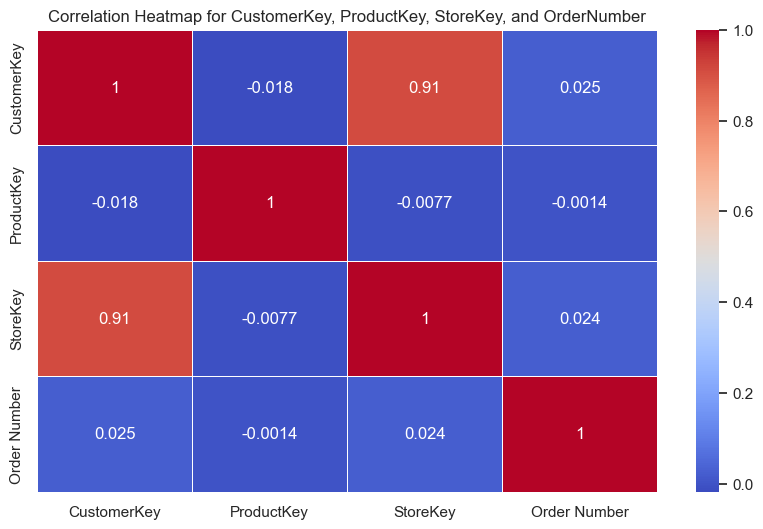

In [118]:
# Step 1: Select relevant columns for correlation
# We will focus on the specified columns: CustomerKey, ProductKey, StoreKey, and OrderNumber
columns_to_correlate = ['CustomerKey', 'ProductKey', 'StoreKey', 'Order Number']
correlation_data = overall_sales[columns_to_correlate]

# Step 2: Calculate the correlation matrix
correlation_matrix = correlation_data.corr()

# Step 3: Visualize the heatmap
plt.figure(figsize=(10, 6))
heatmap = sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap for CustomerKey, ProductKey, StoreKey, and OrderNumber')
plt.show()


In [119]:
# overall_sales.info()

# Connect to sql

In [122]:
myconnection = pymysql.connect(host='127.0.0.1',user='root',passwd='1221')

In [123]:
cursor = myconnection.cursor()

In [147]:
cursor.execute('''create table dataspark.Customers 
                    (CustomerKey INT,
                    Gender CHAR(10),
                    Name VARCHAR(30),
                    City VARCHAR(50),
                    State_Code CHAR(50),
                    State VARCHAR(35),
                    Zip_Code VARCHAR(30),
                    Country VARCHAR(50),
                    Continent VARCHAR(30),
                    Birthday DATE)''')
myconnection.commit()
print("Successfully created Customers Table")

Successfully created Customers Table


In [149]:
for i in range(len(df1)):
    cursor.execute(f"insert into dataspark.Customers value {tuple(df1.iloc[i])}")
    myconnection.commit()
print("All the Datas are successfully inserted into Customers Table")

All the Datas are successfully inserted into Customers Table


In [150]:
pd.read_sql_query('''select * from dataspark.Customers''',myconnection)

C:\Users\91894\AppData\Local\Temp\ipykernel_22792\3956219989.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('''select * from dataspark.Customers''',myconnection)


,CustomerKey,Gender,Name,City,State_Code,State,Zip_Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,1939-07-03
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,1979-09-27
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,1947-05-26
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,1957-09-17
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,1965-11-19
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Dux9aková,Houston,TX,Texas,77017,United States,North America,1936-03-25
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,1992-02-16
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,1937-11-09
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,1937-10-12


In [151]:
cursor.execute("""create table dataspark.Exchange_Rates(Date DATE,
                    Currency VARCHAR(10),
                    Exchange FLOAT) """)
myconnection.commit()
print("Successfully created Exchange_Rates Table")

Successfully created Exchange_Rates Table


In [152]:
for i in range(len(df3)):
    cursor.execute(f"insert into dataspark.Exchange_Rates value {tuple(df3.iloc[i])}")
    myconnection.commit()
print("All the Datas are successfully inserted into Exchange_Rates Table")

All the Datas are successfully inserted into Exchange_Rates Table


In [153]:
pd.read_sql_query('''select * from dataspark.Exchange_Rates''',myconnection)

C:\Users\91894\AppData\Local\Temp\ipykernel_22792\2238619007.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('''select * from dataspark.Exchange_Rates''',myconnection)


,Date,Currency,Exchange
0,2015-01-01,USD,1.0000
1,2015-01-01,CAD,1.1583
2,2015-01-01,AUD,1.2214
3,2015-01-01,EUR,0.8237
4,2015-01-01,GBP,0.6415
...,...,...,...
11210,2021-02-20,USD,1.0000
11211,2021-02-20,CAD,1.2610
11212,2021-02-20,AUD,1.2723
11213,2021-02-20,EUR,0.8238


In [154]:
cursor.execute("""create table dataspark.Products(ProductKey INT,
                    Product_Name  TEXT,
                    Brand   VARCHAR(50),
                    Color  VARCHAR(30),
                    Unit_Cost  VARCHAR(20),
                    Unit_Price  VARCHAR(20),
                    SubcategoryKey  VARCHAR(100),
                    Subcategory  VARCHAR(100),
                    CategoryKey  INT,
                    Category VARCHAR(50)) """)
myconnection.commit()
print("Successfully created Products Table")

Successfully created Products Table


In [155]:
for i in range(len(df4)):
    cursor.execute(f"insert into dataspark.Products value {tuple(df4.iloc[i])}")
    myconnection.commit()
print("All the Datas are successfully inserted into Products Table")

All the Datas are successfully inserted into Products Table


In [156]:
pd.read_sql_query('''select * from dataspark.Products''',myconnection)

C:\Users\91894\AppData\Local\Temp\ipykernel_22792\1054508819.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('''select * from dataspark.Products''',myconnection)


,ProductKey,Product_Name,Brand,Color,Unit_Cost,Unit_Price,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,6.62,12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,6.62,12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,7.40,14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,11.00,21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,11.00,21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,43.07,129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,1.71,3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,1.71,3.35,505,Cell phones Accessories,5,Cell phones


In [157]:
cursor.execute("""create table dataspark.Sales(Order_Number  INT,
                    Line_Item  INT,
                    Order_Date  DATE,
                    Delivery_Date   VARCHAR(30),
                    CustomerKey  INT,
                    StoreKey   INT,
                    ProductKey  INT,
                    Quantity   INT,
                    Currency_Code VARCHAR(10)) """)
myconnection.commit()
print("Successfully created Sales Table")

Successfully created Sales Table


In [158]:
for i in range(len(df5)):
    cursor.execute(f"insert into dataspark.Sales value {tuple(df5.iloc[i])}")
    myconnection.commit()
print("All the Datas are successfully inserted into Sales Table")

All the Datas are successfully inserted into Sales Table


In [159]:
pd.read_sql_query('''select * from dataspark.Sales''',myconnection)

C:\Users\91894\AppData\Local\Temp\ipykernel_22792\2292342739.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('''select * from dataspark.Sales''',myconnection)


,Order_Number,Line_Item,Order_Date,Delivery_Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency_Code
0,366000,1,2016-01-01,Not Available,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13 00:00:00,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13 00:00:00,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12 00:00:00,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12 00:00:00,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,Not Available,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,2021-02-24 00:00:00,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2021-02-23 00:00:00,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2021-02-23 00:00:00,331277,0,1717,2,CAD


In [160]:
cursor.execute("""create table dataspark.Stores(StoreKey  INT,
                        Country  VARCHAR(50),
                        State VARCHAR(50),
                        Square_Meters    FLOAT,
                        Open_Date DATE) """)
myconnection.commit()
print("Successfully created Stores Table")

Successfully created Stores Table


In [161]:
for i in range(len(df6)):
    cursor.execute(f"insert into dataspark.Stores value {tuple(df6.iloc[i])}")
    myconnection.commit()
print("All the Datas are successfully inserted into Stores Table")

All the Datas are successfully inserted into Stores Table


In [162]:
pd.read_sql_query('''select * from dataspark.Stores''',myconnection)

C:\Users\91894\AppData\Local\Temp\ipykernel_22792\3835759241.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('''select * from dataspark.Stores''',myconnection)


,StoreKey,Country,State,Square_Meters,Open_Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


In [163]:
overall_sales_df = pd.read_csv("overall_sales.csv")
overall_sales_df = overall_sales_df.drop(columns='Unnamed: 0')
overall_sales_df

,Order Number,Line Item,Order Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,Name,...,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Date,Currency,Exchange,Square Meters,Open Date
0,366005,1,2016-01-01,844003,33,421,4,EUR,Male,Ouassim Heuver,...,469.00,303,Desktops,3,Computers,2016-01-01,EUR,0.9185,1540.0,2015-12-09
1,367006,1,2016-01-02,693285,18,2445,3,EUR,Female,Solaine Lanoie,...,4.99,808,Fans,8,Home Appliances,2016-01-02,EUR,0.9185,310.0,2012-08-08
2,367010,1,2016-01-02,1322959,66,917,1,USD,Male,Eric Williams,...,179.00,308,Computers Accessories,3,Computers,2016-01-02,USD,1.0000,840.0,2014-01-01
3,367010,2,2016-01-02,1322959,66,39,1,USD,Male,Eric Williams,...,299.23,101,MP4&MP3,1,Audio,2016-01-02,USD,1.0000,840.0,2014-01-01
4,369007,1,2016-01-04,571622,20,2510,3,EUR,Male,Sven Schulze,...,4.06,505,Cell phones Accessories,5,Cell phones,2016-01-04,EUR,0.9176,1715.0,2012-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6176,2243014,1,2021-02-20,1453427,50,423,1,USD,Male,Ralph Thompson,...,599.00,303,Desktops,3,Computers,2021-02-20,USD,1.0000,2000.0,2008-03-06
6177,2243014,2,2021-02-20,1453427,50,1617,1,USD,Male,Ralph Thompson,...,57.99,602,Movie DVD,6,"Music, Movies and Audio Books",2021-02-20,USD,1.0000,2000.0,2008-03-06
6178,2243014,3,2021-02-20,1453427,50,2506,4,USD,Male,Ralph Thompson,...,4.74,505,Cell phones Accessories,5,Cell phones,2021-02-20,USD,1.0000,2000.0,2008-03-06
6179,2243021,1,2021-02-20,1783631,55,1147,4,USD,Male,Louis Camacho,...,655.00,405,Camcorders,4,Cameras and camcorders,2021-02-20,USD,1.0000,2000.0,2009-12-15


In [164]:
cursor.execute("""create table dataspark.Overall_Sales(OrderNumber INT,
                        Line_Item  INT,
                        Order_Date  DATE,
                        CustomerKey    INT,
                        StoreKey INT,
                        ProductKey INT,
                        Quantity INT,
                        Currency_Code VARCHAR(10),
                        Gender CHAR(10),
                        Name VARCHAR(50),
                        City VARCHAR(50),
                        State_Code CHAR(50),
                        State VARCHAR(35),
                        Zip_Code VARCHAR(30),
                        Country VARCHAR(50),
                        Continent VARCHAR(30),
                        Birthday DATE,
                        Product_Name TEXT,
                        Brand VARCHAR(50),
                        Color VARCHAR(30),
                        Unit_Cost_USD VARCHAR(20),
                        Unit_Price_USD VARCHAR(20),
                        SubcategoryKey VARCHAR(100),
                        Subcategory VARCHAR(100),
                        CategoryKey INT,
                        Category VARCHAR(50),
                        Date DATE,
                        Currency VARCHAR(10),
                        Exchange FLOAT,
                        Square_Meters FLOAT,
                        Open_Date DATE) """)
myconnection.commit()
print("Successfully created Overall_Sales Table")

Successfully created Overall_Sales Table


In [165]:
for i in range(len(overall_sales_df)):
    cursor.execute(f"insert into dataspark.Overall_Sales value {tuple(overall_sales_df.iloc[i])}")
    myconnection.commit()
print("All the Datas are successfully inserted into Overall_Sales Table")

All the Datas are successfully inserted into Overall_Sales Table


In [166]:
pd.read_sql_query('''select * from dataspark.Overall_Sales''',myconnection)

C:\Users\91894\AppData\Local\Temp\ipykernel_22792\3686633783.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  pd.read_sql_query('''select * from dataspark.Overall_Sales''',myconnection)


,OrderNumber,Line_Item,Order_Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency_Code,Gender,Name,...,Unit_Price_USD,SubcategoryKey,Subcategory,CategoryKey,Category,Date,Currency,Exchange,Square_Meters,Open_Date
0,366005,1,2016-01-01,844003,33,421,4,EUR,Male,Ouassim Heuver,...,469.00,303,Desktops,3,Computers,2016-01-01,EUR,0.9185,1540.0,2015-12-09
1,367006,1,2016-01-02,693285,18,2445,3,EUR,Female,Solaine Lanoie,...,4.99,808,Fans,8,Home Appliances,2016-01-02,EUR,0.9185,310.0,2012-08-08
2,367010,1,2016-01-02,1322959,66,917,1,USD,Male,Eric Williams,...,179.00,308,Computers Accessories,3,Computers,2016-01-02,USD,1.0000,840.0,2014-01-01
3,367010,2,2016-01-02,1322959,66,39,1,USD,Male,Eric Williams,...,299.23,101,MP4&MP3,1,Audio,2016-01-02,USD,1.0000,840.0,2014-01-01
4,369007,1,2016-01-04,571622,20,2510,3,EUR,Male,Sven Schulze,...,4.06,505,Cell phones Accessories,5,Cell phones,2016-01-04,EUR,0.9176,1715.0,2012-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6176,2243014,1,2021-02-20,1453427,50,423,1,USD,Male,Ralph Thompson,...,599.00,303,Desktops,3,Computers,2021-02-20,USD,1.0000,2000.0,2008-03-06
6177,2243014,2,2021-02-20,1453427,50,1617,1,USD,Male,Ralph Thompson,...,57.99,602,Movie DVD,6,"Music, Movies and Audio Books",2021-02-20,USD,1.0000,2000.0,2008-03-06
6178,2243014,3,2021-02-20,1453427,50,2506,4,USD,Male,Ralph Thompson,...,4.74,505,Cell phones Accessories,5,Cell phones,2021-02-20,USD,1.0000,2000.0,2008-03-06
6179,2243021,1,2021-02-20,1783631,55,1147,4,USD,Male,Louis Camacho,...,655.00,405,Camcorders,4,Cameras and camcorders,2021-02-20,USD,1.0000,2000.0,2009-12-15
